In [1]:
import pandas as pd
import numpy as np

This notebook is submitted as a supplementary material and contains the data cleaning part.

What data do I have available (open-sourced by volunteers at AirKaz):
1) The readings of the sensors for years 2017-2020 in Alamaty (P.M. 2.5)
2) The amount of coal burnt in CHP#2 from 1-Jan-2019 to 25-March-2020 (14 months)
3) The amount of coal burnt in CHP#3 from 1-Oct-2020 to 25-March-2020 (6 months)

Scenario:
A group of voluneteers placed sensors all across the city of Almaty, and measured recordings of P.M 2.5 pollutant matters across the span of years 2017-2020. Apart from that, they have approached a power plant administrators to provide data on the amount of coal burnt during the years 2019-2020. Their goal is to show the results to the government to incentivise changes. 

They have open-sourced the data, making it publicly available. However, it is not enough since they also have to be able to speak their findings to the general public and governing people. To achieve this, activists decided that they need an interactive dashboard to make help them to effectively present their findings to the governing people and general public. 

The dashboard should be able to show:
1) The average amount of pollutant matters on each district of Almaty across time (on the map, geopandas) (with color mapping) (done, add data about districts)
2) How do the amount of pollutant matters relate to the amount of coal burnt in the Power Plants (on the map, geopandas) (with colour mapping) (add amount of coal burnt when hovering)
3) A graph that shows a possible correlation between air pollution levels and amount of coils burnt
4) The locations of Power Plants mapped on GeoPandas (done)
5) A slider (using widgets?) to visualize sensor readings and coal burnt across time (in progress)
6) Allow a user to select specific time span to explore air pollution (done)
7) Side-by-side comparison of air pollution in different years (drop)
8) Show the dates when the sensors detected unusually high readings (to be done)
9) Download the visualizations (hopefully, gifs) (to be done)
10) Additional statictics (mean, variance across the chosen time frame) (done)


In [2]:
df_sensors = pd.read_excel("../data/daily_almaty_6oct20.xlsx", sheet_name='sensors')
df_data = pd.read_excel("../data/daily_almaty_6oct20.xlsx", sheet_name='data')

DF_data

In [3]:
df_data.head()

,Row Labels,1,2,3,4,5,6,7,8,9,...,7723955,30369354,34703847,36200067,36671067,37052366,38834077,39168240,39379024,Grand Total
0,22-Mar,NaN,91.982979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.982979
1,23-Mar,NaN,84.649269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.649269
2,24-Mar,208.403433,43.675636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.039535
3,25-Mar,67.575610,58.792217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.183913
4,26-Mar,45.677083,48.348401,NaN,21.692308,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.572597


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291 entries, 0 to 1290
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Row Labels   1291 non-null   object 
 1   1            941 non-null    float64
 2   2            1181 non-null   float64
 3   3            842 non-null    float64
 4   4            645 non-null    float64
 5   5            1190 non-null   float64
 6   6            1219 non-null   float64
 7   7            952 non-null    float64
 8   8            472 non-null    float64
 9   9            1175 non-null   float64
 10  10           325 non-null    float64
 11  11           263 non-null    float64
 12  12           1169 non-null   float64
 13  13           347 non-null    float64
 14  14           826 non-null    float64
 15  15           16 non-null     float64
 16  16           1047 non-null   float64
 17  17           157 non-null    float64
 18  18           921 non-null    float64
 19  19    

For now, I have decided to set all the nulls to 0. 
Another approaches would be:
 1) To set it to -1, and then show in the map that the data is missing.
 2) To ignore the sensors that have too much missing data. and try to impute the missing values

In [5]:
df_data = df_data.fillna(0)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291 entries, 0 to 1290
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Row Labels   1291 non-null   object 
 1   1            1291 non-null   float64
 2   2            1291 non-null   float64
 3   3            1291 non-null   float64
 4   4            1291 non-null   float64
 5   5            1291 non-null   float64
 6   6            1291 non-null   float64
 7   7            1291 non-null   float64
 8   8            1291 non-null   float64
 9   9            1291 non-null   float64
 10  10           1291 non-null   float64
 11  11           1291 non-null   float64
 12  12           1291 non-null   float64
 13  13           1291 non-null   float64
 14  14           1291 non-null   float64
 15  15           1291 non-null   float64
 16  16           1291 non-null   float64
 17  17           1291 non-null   float64
 18  18           1291 non-null   float64
 19  19    

In [6]:
df_data['Row Labels']

0       22-Mar
1       23-Mar
2       24-Mar
3       25-Mar
4       26-Mar
         ...  
1286     3-Oct
1287     4-Oct
1288     5-Oct
1289     6-Oct
1290     7-Oct
Name: Row Labels, Length: 1291, dtype: object

In [7]:
df_data['Row Labels'] = df_data['Row Labels'].astype(str)
#this is the specific date in the dataset that has incorrect format
df_data.loc[1098, 'Row Labels'] = '29-Mar'
#the dates also span betweeb 2019 to 2020, and therefore need to be adjusted accordingly
df_data.loc[:1009, 'date'] = pd.to_datetime(df_data.loc[:1009, 'Row Labels'] + '-2019', format='%d-%b-%Y')
df_data.loc[1010:, 'date'] = pd.to_datetime(df_data.loc[1010:, 'Row Labels'] + '-2020', format='%d-%b-%Y')

In [8]:
df_data[:5]

,Row Labels,1,2,3,4,5,6,7,8,9,...,30369354,34703847,36200067,36671067,37052366,38834077,39168240,39379024,Grand Total,date
0,22-Mar,0.000000,91.982979,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.982979,2019-03-22
1,23-Mar,0.000000,84.649269,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.649269,2019-03-23
2,24-Mar,208.403433,43.675636,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.039535,2019-03-24
3,25-Mar,67.575610,58.792217,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.183913,2019-03-25
4,26-Mar,45.677083,48.348401,0.0,21.692308,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.572597,2019-03-26


In [9]:
df_data.drop(columns=['Row Labels'], inplace=True)

In [10]:
df_data.drop(columns=['Grand Total'], inplace=True)

In [11]:
df_data[:5]

,1,2,3,4,5,6,7,8,9,10,...,7723955,30369354,34703847,36200067,36671067,37052366,38834077,39168240,39379024,date
0,0.000000,91.982979,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-22
1,0.000000,84.649269,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-23
2,208.403433,43.675636,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-24
3,67.575610,58.792217,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-25
4,45.677083,48.348401,0.0,21.692308,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-26


In [ ]:
df_long = df_data.melt(
    id_vars=['date'],  
    var_name='Sensor ID',   
    value_name='Reading'   
)

df_long['Sensor ID'] = pd.to_numeric(df_long['Sensor ID'])

df_long

,date,Sensor ID,Reading
0,2019-03-22,1,0.000000
1,2019-03-23,1,0.000000
2,2019-03-24,1,208.403433
3,2019-03-25,1,67.575610
4,2019-03-26,1,45.677083
...,...,...,...
51635,2020-10-03,39379024,33.540000
51636,2020-10-04,39379024,0.000000
51637,2020-10-05,39379024,0.000000
51638,2020-10-06,39379024,0.000000


DF sensors

In [13]:
df_sensors.head()

,id,name,city,lat,lng
0,1,Сейфуллина - Дулатова (TS225957),Алматы,43.313,76.939
1,2,Альфараби - Маркова,Алматы,43.224,76.938
2,3,Абая - Тлендиева,Алматы,43.240,76.874
3,4,Парк Горького,Алматы,43.265,76.973
4,5,ТолеБи - Байзакова,Алматы,43.253,76.910


In [14]:
df_sensors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      48 non-null     int64  
 1   name    48 non-null     object 
 2   city    48 non-null     object 
 3   lat     48 non-null     float64
 4   lng     48 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.0+ KB


The the locations of the sensors in lat and lng can be converted into geopandas geometry type

In [15]:
import geopandas as gpd

# Create geometry in df_sensors
df_sensors = gpd.GeoDataFrame(
    df_sensors,
    geometry=gpd.points_from_xy(df_sensors['lng'], df_sensors['lat']),
    crs="EPSG:4326"  # Set the coordinate reference system
)

# lat and lng are now redundant
# since all of the sensors are located at Almaty, the column city can also be disregarded
# for now, I am unsure I need to keep the sensor names
df_sensors.drop(columns=['lat', 'lng', 'city'], inplace=True)


In [16]:
df_sensors[:5]

,id,name,geometry
0,1,Сейфуллина - Дулатова (TS225957),POINT (76.93900 43.31300)
1,2,Альфараби - Маркова,POINT (76.93800 43.22400)
2,3,Абая - Тлендиева,POINT (76.87400 43.24000)
3,4,Парк Горького,POINT (76.97300 43.26500)
4,5,ТолеБи - Байзакова,POINT (76.91000 43.25300)


In [17]:
df_data.shape

(1291, 41)

I thought of merging the two dataframes for convinience in the future use

In [18]:
combined_df = pd.merge(
    df_long,
    df_sensors,
    how='left',
    left_on='Sensor ID',
    right_on='id'
)

In [19]:
combined_df.drop(columns=['id'], inplace=True)

In [20]:
combined_df

,date,Sensor ID,Reading,name,geometry
0,2019-03-22,1,0.000000,Сейфуллина - Дулатова (TS225957),POINT (76.93900 43.31300)
1,2019-03-23,1,0.000000,Сейфуллина - Дулатова (TS225957),POINT (76.93900 43.31300)
2,2019-03-24,1,208.403433,Сейфуллина - Дулатова (TS225957),POINT (76.93900 43.31300)
3,2019-03-25,1,67.575610,Сейфуллина - Дулатова (TS225957),POINT (76.93900 43.31300)
4,2019-03-26,1,45.677083,Сейфуллина - Дулатова (TS225957),POINT (76.93900 43.31300)
...,...,...,...,...,...
51635,2020-10-03,39379024,33.540000,Муканова 159,POINT (76.91400 43.25720)
51636,2020-10-04,39379024,0.000000,Муканова 159,POINT (76.91400 43.25720)
51637,2020-10-05,39379024,0.000000,Муканова 159,POINT (76.91400 43.25720)
51638,2020-10-06,39379024,0.000000,Муканова 159,POINT (76.91400 43.25720)


In [21]:
combined_df.to_csv("../data/sensor_readings_cleaned.csv")

In [22]:
missing_values = combined_df.isnull().sum()
missing_values

date         0
Sensor ID    0
Reading      0
name         0
geometry     0
dtype: int64

In [23]:
print(combined_df['Reading'].describe())  # Summary statistics
outliers = combined_df[combined_df['Reading'] < 0]
if not outliers.empty:
    print(outliers)  # Review negative values


count    51640.000000
mean        16.533726
std         36.626653
min         -3.230000
25%          0.000000
50%          0.000000
75%         18.465122
max        950.590000
Name: Reading, dtype: float64
            date  Sensor ID  Reading           name                   geometry
42472 2020-05-30   30369354    -3.23  Тулебаева, 82  POINT (76.94840 43.25760)


CHP data

In [24]:
df_chps = pd.read_excel("../data/daily_almaty_6oct20.xlsx", sheet_name='coil_comp')
df_chps

,date,"pm2.5, мкг","ТЭЦ2, тонн","ТЭЦ3, тонн"
0,2019-01-01 00:00:00,63.377312,7990.0,NaN
1,2019-01-02 00:00:00,93.661700,8152.0,NaN
2,2019-01-03 00:00:00,157.779075,7919.0,NaN
3,2019-01-04 00:00:00,83.475979,8042.0,NaN
4,2019-01-05 00:00:00,74.734643,8263.0,NaN
...,...,...,...,...
448,24-Mar,22.343291,8722.0,2461.213
449,25-Mar,38.240804,8302.0,2095.831
450,26-Mar,48.132158,NaN,NaN
451,27-Mar,72.216199,NaN,NaN


In [25]:
df_chps.loc[:272, "date"] = pd.to_datetime(df_chps.loc[:272, "date"])

In [26]:
df_chps.loc[:, "date"]

0      2019-01-01 00:00:00
1      2019-01-02 00:00:00
2      2019-01-03 00:00:00
3      2019-01-04 00:00:00
4      2019-01-05 00:00:00
              ...         
448                 24-Mar
449                 25-Mar
450                 26-Mar
451                 27-Mar
452                 28-Mar
Name: date, Length: 453, dtype: object

In [27]:
df_chps.loc[273:365, "date"]

273     1-Oct
274     2-Oct
275     3-Oct
276     4-Oct
277     5-Oct
        ...  
361    28-Dec
362    29-Dec
363    30-Dec
364    31-Dec
365     1-Jan
Name: date, Length: 93, dtype: object

In [28]:
df_chps.loc[273:, "date"] = df_chps.loc[:, "date"].astype("str")
df_chps.loc[273:365, "date"] = pd.to_datetime(df_chps.loc[273:365, "date"] + '-2019', format='%d-%b-%Y') 
df_chps.loc[366:, "date"] = pd.to_datetime(df_chps.loc[366:, "date"] + '-2020', format='%d-%b-%Y')


In [29]:
df_chps.fillna(value=0, inplace=True)

In [30]:
df_chps['date'] = pd.to_datetime(df_chps['date'])

I want to include the coal burning data into the dataframe

In [32]:
combined_gdf = pd.merge(
        combined_df,
        df_chps,
        how='left',
        left_on='date',
        right_on='date'
    )

combined_gdf

,date,Sensor ID,Reading,name,geometry,"pm2.5, мкг","ТЭЦ2, тонн","ТЭЦ3, тонн"
0,2019-03-22,1,0.000000,Сейфуллина - Дулатова (TS225957),POINT (76.93900 43.31300),89.203308,8643.0,0.0
1,2019-03-23,1,0.000000,Сейфуллина - Дулатова (TS225957),POINT (76.93900 43.31300),90.783514,8171.0,0.0
2,2019-03-24,1,208.403433,Сейфуллина - Дулатова (TS225957),POINT (76.93900 43.31300),47.493938,7133.0,0.0
3,2019-03-25,1,67.575610,Сейфуллина - Дулатова (TS225957),POINT (76.93900 43.31300),45.113514,7711.0,0.0
4,2019-03-26,1,45.677083,Сейфуллина - Дулатова (TS225957),POINT (76.93900 43.31300),45.672026,7829.0,0.0
...,...,...,...,...,...,...,...,...
51715,2020-10-03,39379024,33.540000,Муканова 159,POINT (76.91400 43.25720),NaN,NaN,NaN
51716,2020-10-04,39379024,0.000000,Муканова 159,POINT (76.91400 43.25720),NaN,NaN,NaN
51717,2020-10-05,39379024,0.000000,Муканова 159,POINT (76.91400 43.25720),NaN,NaN,NaN
51718,2020-10-06,39379024,0.000000,Муканова 159,POINT (76.91400 43.25720),NaN,NaN,NaN


In [33]:
combined_gdf.to_csv('../data/sensors_chp.csv')

In [61]:
# Save in multiple formats for flexibility
combined_gdf['geometry'] = combined_gdf['geometry'].apply(lambda x: x.wkt)
combined_gdf.to_csv("../data/combined_data.csv", index=False)


C:\Users\Dias\AppData\Local\Temp\ipykernel_42560\483587163.py:2: UserWarning: Geometry column does not contain geometry.
  combined_gdf['geometry'] = combined_gdf['geometry'].apply(lambda x: x.wkt)


In [34]:
combined_gdf['Reading_scaled'] = combined_gdf['Reading'] * 220

<Axes: xlabel='date'>

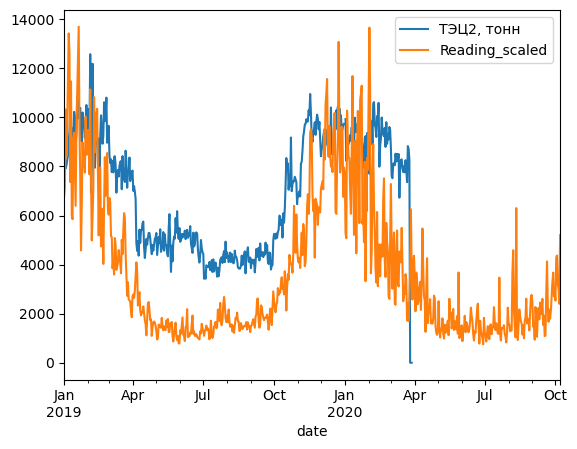

In [35]:
combined_gdf.groupby('date')[['ТЭЦ2, тонн', 'Reading_scaled']].mean().plot()


Plotting stuff

In [36]:
combined_gdf.crs = "EPSG:4326"

<Axes: >

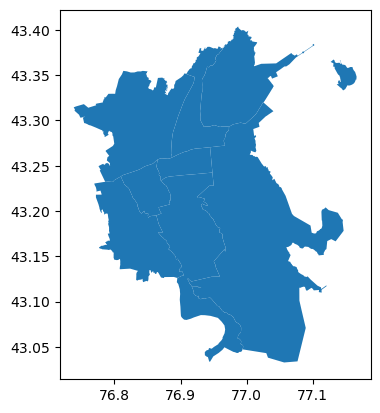

In [38]:
almaty_boundaries = gpd.read_file('almaty-districts.geo.json')

almaty_boundaries.plot()